In [81]:
import math as m
from math import *
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

In [83]:
import io
df = pd.read_csv("/content/treinamento.csv")
df_sem_null = pd.read_csv("/content/treinamento_sem_null.csv")

In [84]:
df.head(10)

,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente,AreaPropriedade,Concedido
0,LP001002,Masculino,Nao,0,Superior,Nao,5849,0.0,NaN,360.0,1.0,Urbano,S
1,LP001003,Masculino,Sim,1,Superior,Nao,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Masculino,Sim,0,Superior,Sim,3000,0.0,66.0,360.0,1.0,Urbano,S
3,LP001006,Masculino,Sim,0,Nao Superior,Nao,2583,2358.0,120.0,360.0,1.0,Urbano,S
4,LP001008,Masculino,Nao,0,Superior,Nao,6000,0.0,141.0,360.0,1.0,Urbano,S
5,LP001011,Masculino,Sim,2,Superior,Sim,5417,4196.0,267.0,360.0,1.0,Urbano,S
6,LP001013,Masculino,Sim,0,Nao Superior,Nao,2333,1516.0,95.0,360.0,1.0,Urbano,S
7,LP001014,Masculino,Sim,3+,Superior,Nao,3036,2504.0,158.0,360.0,0.0,SemiUrbano,N
8,LP001018,Masculino,Sim,2,Superior,Nao,4006,1526.0,168.0,360.0,1.0,Urbano,S
9,LP001020,Masculino,Sim,1,Superior,Nao,12841,10968.0,349.0,360.0,1.0,SemiUrbano,N


In [85]:
df.describe()

,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               614 non-null    object 
 1   Sexo             601 non-null    object 
 2   Casado           611 non-null    object 
 3   Dependentes      599 non-null    object 
 4   Educacao         614 non-null    object 
 5   Autonomo         582 non-null    object 
 6   Renda            614 non-null    int64  
 7   RendaSocio       614 non-null    float64
 8   ValorEmprestimo  592 non-null    float64
 9   Prazo            600 non-null    float64
 10  Adimplente       564 non-null    float64
 11  AreaPropriedade  614 non-null    object 
 12  Concedido        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
df.corr()

,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente
Renda,1.000000,-0.116605,0.570909,-0.045306,-0.014715
RendaSocio,-0.116605,1.000000,0.188619,-0.059878,-0.002056
ValorEmprestimo,0.570909,0.188619,1.000000,0.039447,-0.008433
Prazo,-0.045306,-0.059878,0.039447,1.000000,0.001470
Adimplente,-0.014715,-0.002056,-0.008433,0.001470,1.000000


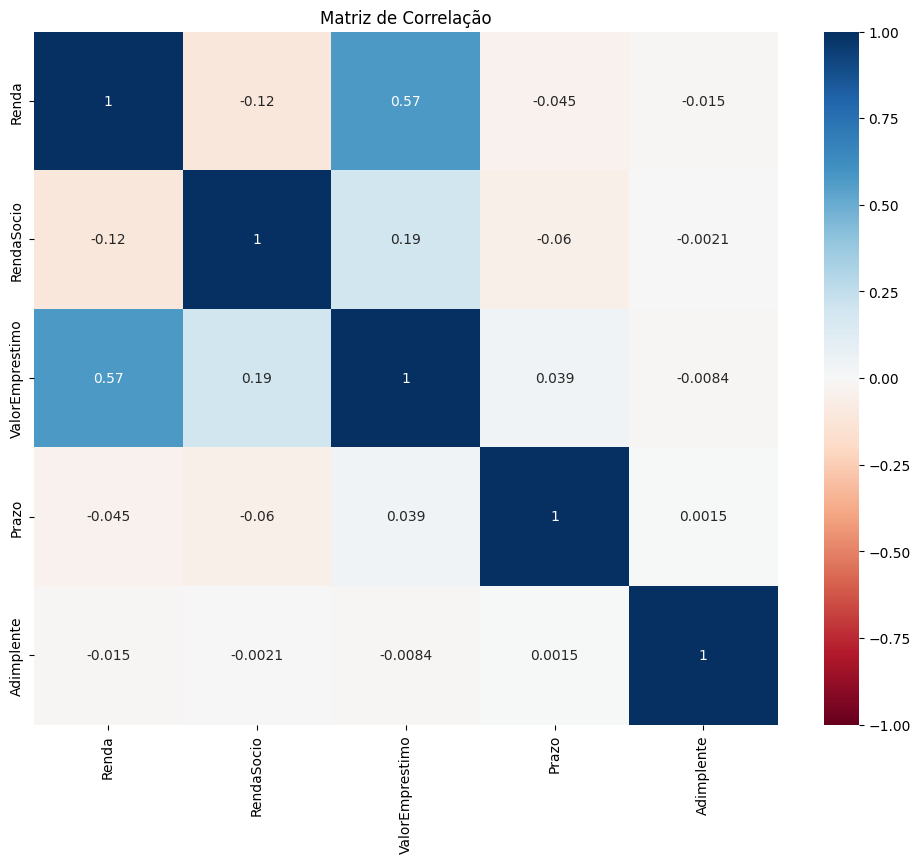

In [88]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Matriz de Correlação')
plt.show()

In [89]:
df['AreaPropriedade'].value_counts()

SemiUrbano    233
Urbano        202
Rural         179
Name: AreaPropriedade, dtype: int64

Text(0, 0.5, 'Renda')

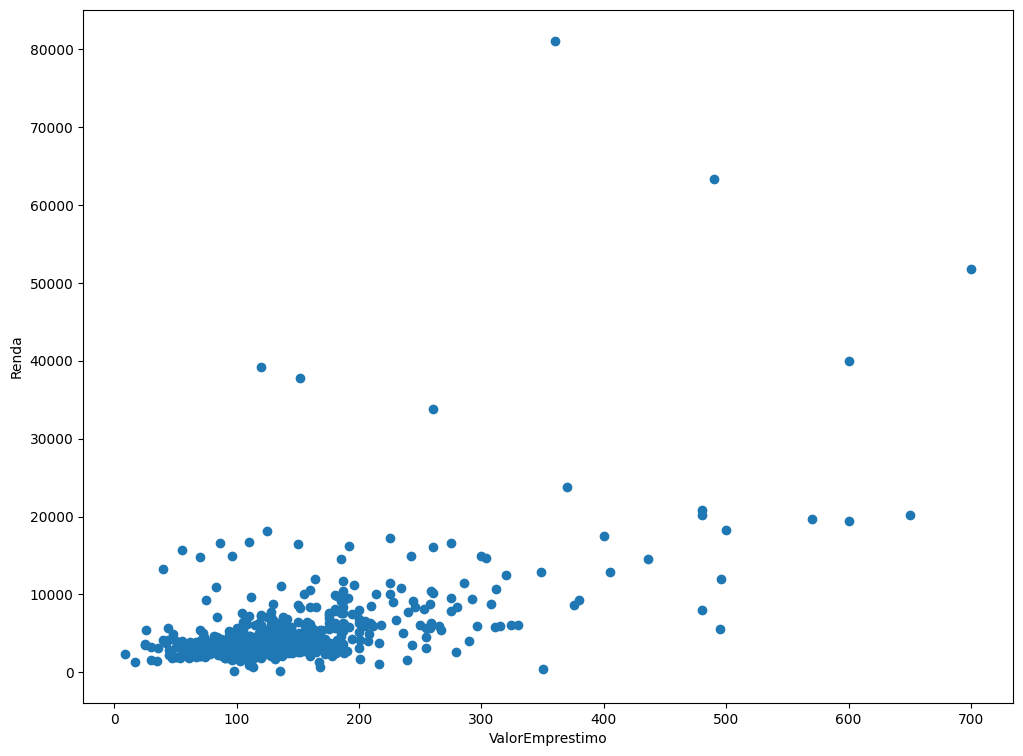

In [90]:
plt.figure(figsize=(12, 9))
plt.scatter(df['ValorEmprestimo'], df['Renda'])
plt.xlabel('ValorEmprestimo')
plt.ylabel('Renda')

<Axes: >

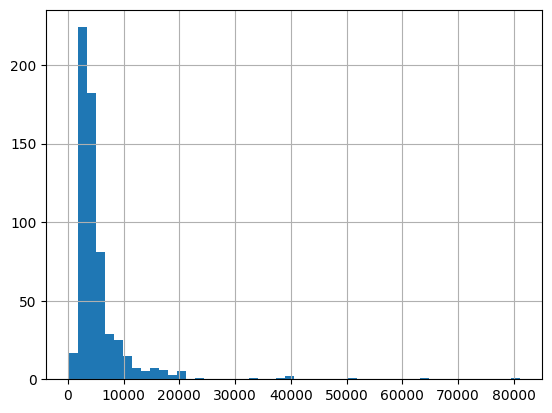

In [91]:
df['Renda'].hist(bins=50)

<Axes: >

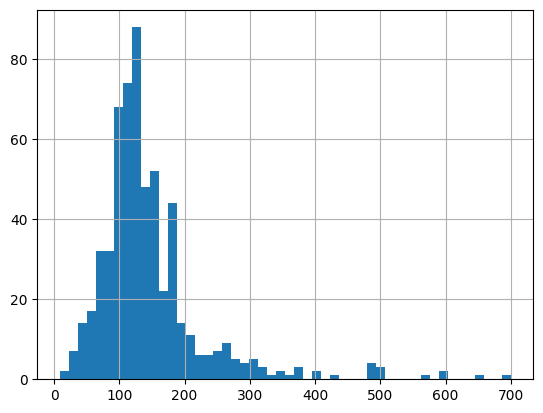

In [92]:
df['ValorEmprestimo'].hist(bins=50)

<Axes: >

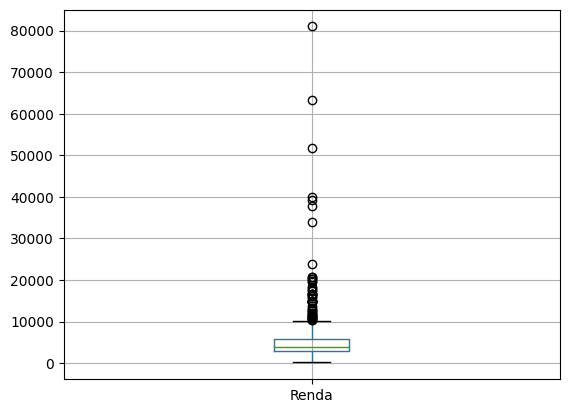

In [93]:
df.boxplot(column='Renda')

<Axes: title={'center': 'Renda'}, xlabel='Educacao'>

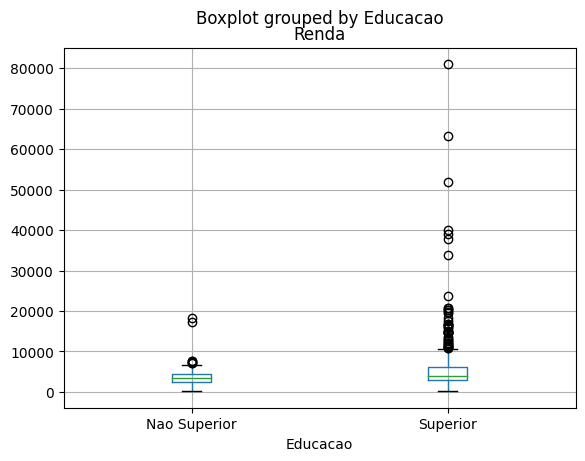

In [94]:
df.boxplot(column='Renda', by = 'Educacao')

<Axes: xlabel='Adimplente'>

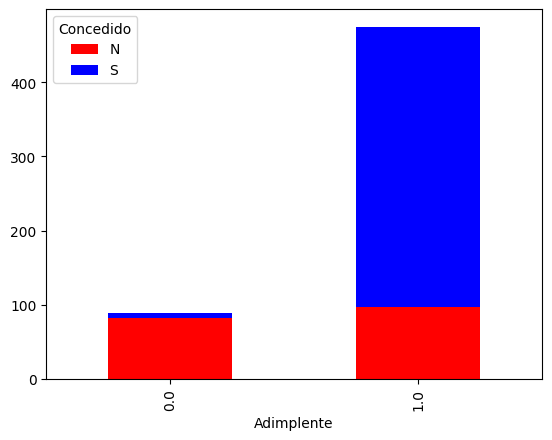

In [95]:
temp3 = pd.crosstab(df['Adimplente'], df['Concedido'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [96]:
df.apply(lambda x: sum(x.isnull()),axis=0)

ID                  0
Sexo               13
Casado              3
Dependentes        15
Educacao            0
Autonomo           32
Renda               0
RendaSocio          0
ValorEmprestimo    22
Prazo              14
Adimplente         50
AreaPropriedade     0
Concedido           0
dtype: int64

In [97]:
df['Autonomo'].fillna('Nao',inplace=True)
df['ValorEmprestimo'].fillna(df['ValorEmprestimo'].mean(), inplace=True)

In [98]:
df_sem_null.head(10)

,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente,AreaPropriedade,Concedido
0,LP001002,Masculino,Nao,0,Superior,Nao,5849,0,120,360,1,Urbano,S
1,LP001003,Masculino,Sim,1,Superior,Nao,4583,1508,128,360,1,Rural,N
2,LP001005,Masculino,Sim,0,Superior,Sim,3000,0,66,360,1,Urbano,S
3,LP001006,Masculino,Sim,0,Nao Superior,Nao,2583,2358,120,360,1,Urbano,S
4,LP001008,Masculino,Nao,0,Superior,Nao,6000,0,141,360,1,Urbano,S
5,LP001011,Masculino,Sim,2,Superior,Sim,5417,4196,267,360,1,Urbano,S
6,LP001013,Masculino,Sim,0,Nao Superior,Nao,2333,1516,95,360,1,Urbano,S
7,LP001014,Masculino,Sim,3,Superior,Nao,3036,2504,158,360,0,SemiUrbano,N
8,LP001018,Masculino,Sim,2,Superior,Nao,4006,1526,168,360,1,Urbano,S
9,LP001020,Masculino,Sim,1,Superior,Nao,12841,10968,349,360,1,SemiUrbano,N


<Axes: >

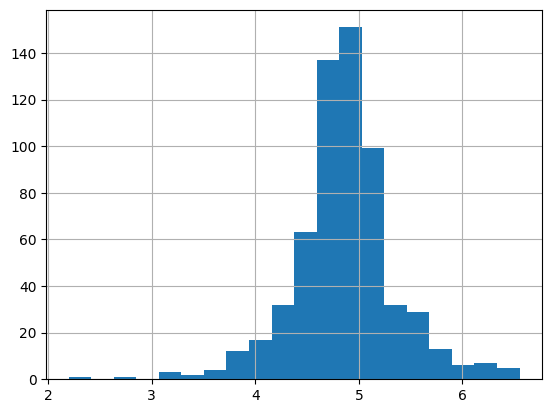

In [99]:
df_sem_null['ValorEmprestimo_log'] = np.log(df['ValorEmprestimo'])
df_sem_null['ValorEmprestimo_log'].hist(bins=20)


In [100]:
df = df_sem_null

In [101]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sexo','Casado','Dependentes','Educacao','Autonomo','AreaPropriedade', 'Concedido']
le = LabelEncoder()
for i in var_mod:
    print(i)
    df[i] = le.fit_transform(df[i].astype(str))
    print('le.classes_')
    print(list(le.classes_))
    print('inverse_transform')
    if i == 'Sexo' or i == 'Casado' or i == 'Educacao' or i == 'Autonomo' or i == 'Concedido':
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1')
    elif i == 'Dependentes':
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1', le.inverse_transform([2]), ': 2', le.inverse_transform([3]), ': 3')
    else:
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1', le.inverse_transform([2]), ': 2')

Sexo
le.classes_
['Feminino', 'Masculino']
inverse_transform
['Feminino'] : 0 ['Masculino'] : 1
Casado
le.classes_
['Nao', 'Sim']
inverse_transform
['Nao'] : 0 ['Sim'] : 1
Dependentes
le.classes_
['0', '1', '2', '3']
inverse_transform
['0'] : 0 ['1'] : 1 ['2'] : 2 ['3'] : 3
Educacao
le.classes_
['Nao Superior', 'Superior']
inverse_transform
['Nao Superior'] : 0 ['Superior'] : 1
Autonomo
le.classes_
['Nao', 'Sim']
inverse_transform
['Nao'] : 0 ['Sim'] : 1
AreaPropriedade
le.classes_
['Rural', 'SemiUrbano', 'Urbano']
inverse_transform
['Rural'] : 0 ['SemiUrbano'] : 1 ['Urbano'] : 2
Concedido
le.classes_
['N', 'S']
inverse_transform
['N'] : 0 ['S'] : 1


In [102]:
df = df.drop(['ID'], axis=1)
X = df.drop('Adimplente', axis=1)
y = df[['Adimplente']]
X1 = df[['ValorEmprestimo']]

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
x_train

,ValorEmprestimo
90,131
533,196
452,149
355,116
266,150
...,...
277,80
9,349
359,200
192,160


In [104]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(x_train, y_train)

print(regressao.intercept_)
print(regressao.coef_)

[0.85763845]
[[-4.31881632e-05]]


In [105]:
#Import models from scikit learn module:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import (
    accuracy_score,
    auc,
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    multilabel_confusion_matrix,
    v_measure_score,
    silhouette_score,
    r2_score,
)

def classification_model(model, data, predictors, outcome):
    # Fit the model
    model.fit(data[predictors], data[outcome])

    # Make predictions on the training set
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = accuracy_score(predictions, data[outcome])
    print("Accuracy: {0:.3%}".format(accuracy))

    # Calculate AUC
    auc_score = roc_auc_score(data[outcome], predictions)
    print("AUC: {0:.3%}".format(auc_score))

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(data[outcome], predictions)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Print other metrics
    recall = recall_score(predictions, data[outcome], average='macro')
    print("Recall: {0:.3%}".format(recall))

    precisao = precision_score(predictions, data[outcome], average='macro')
    print("Precisão: {0:.3%}".format(precisao))

    f1 = f1_score(predictions, data[outcome], average='macro')
    print("F1: {0:.3%}".format(f1))

    conf_matrix = confusion_matrix(data[outcome], predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    multilabel_conf_matrix = multilabel_confusion_matrix(data[outcome], predictions)
    print("Multilabel Confusion Matrix:")
    print(multilabel_conf_matrix)

    v_measure = v_measure_score(data[outcome], predictions)
    print("V-measure Score: {0:.3%}".format(v_measure))

    silhouette = silhouette_score(data[predictors], predictions)
    print("Silhouette Score: {0:.3%}".format(silhouette))

    r2 = r2_score(data[outcome], predictions)
    print("R2 Score: {0:.3%}".format(r2))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation: {0:.3%}".format(np.mean(error)))

    # Fit the model again so that it can be referred to outside the function
    model.fit(data[predictors], data[outcome])


Accuracy: 80.945%
AUC: 70.525%


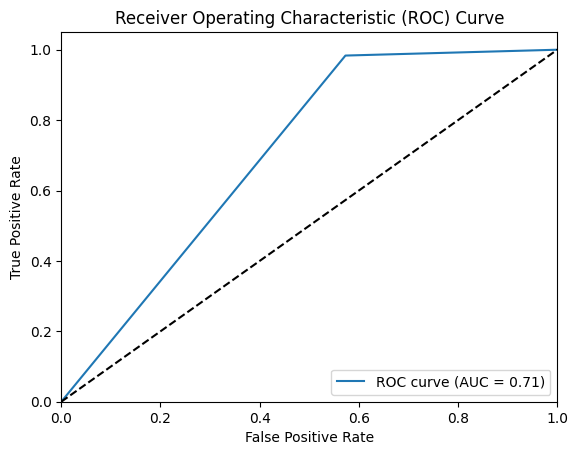

Recall: 85.591%
Precisão: 70.525%
F1: 73.004%
Confusion Matrix:
[[ 82 110]
 [  7 415]]
Multilabel Confusion Matrix:
[[[415   7]
  [110  82]]

 [[ 82 110]
  [  7 415]]]
V-measure Score: 27.514%
Silhouette Score: 100.000%
R2 Score: 11.337%
Cross-Validation: 80.946%


In [106]:
outcome_var = 'Concedido'
model = LogisticRegression(solver='lbfgs')
predictor_var = ['Adimplente']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 80.945%
AUC: 70.525%


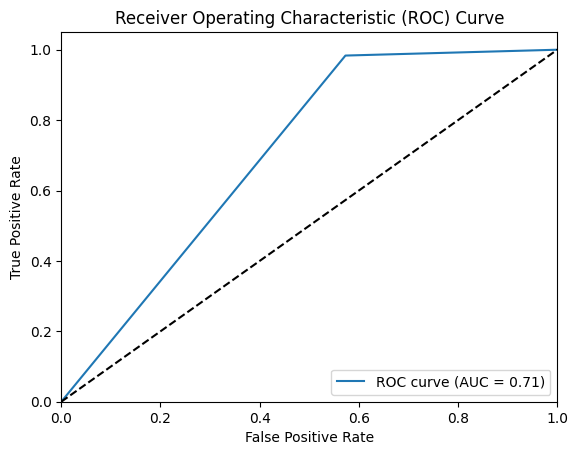

Recall: 85.591%
Precisão: 70.525%
F1: 73.004%
Confusion Matrix:
[[ 82 110]
 [  7 415]]
Multilabel Confusion Matrix:
[[[415   7]
  [110  82]]

 [[ 82 110]
  [  7 415]]]
V-measure Score: 27.514%
Silhouette Score: 40.173%
R2 Score: 11.337%
Cross-Validation: 80.946%


In [107]:
model = DecisionTreeClassifier()
predictor_var = ['Adimplente','Sexo','Casado','Educacao']
classification_model(model, df,predictor_var,outcome_var)


Accuracy: 98.534%
AUC: 97.798%


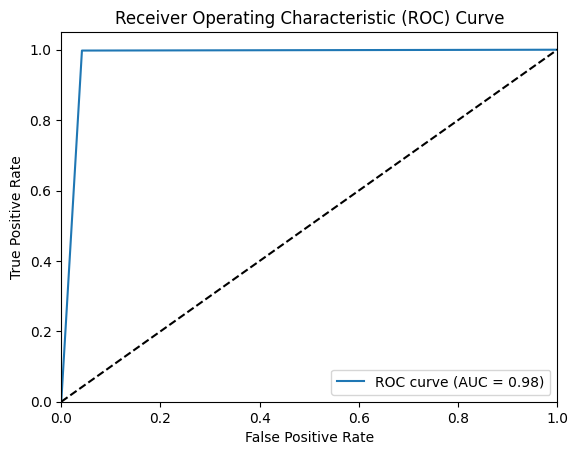

Recall: 98.797%
Precisão: 97.798%
F1: 98.278%
Confusion Matrix:
[[184   8]
 [  1 421]]
Multilabel Confusion Matrix:
[[[421   1]
  [  8 184]]

 [[184   8]
  [  1 421]]]
V-measure Score: 88.603%
Silhouette Score: 4.420%
R2 Score: 93.180%
Cross-Validation: 75.407%


In [108]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Sexo','Casado','Educacao', 'Dependentes', 'Autonomo', 'Adimplente', 'AreaPropriedade', 'ValorEmprestimo_log']
classification_model(model, df,predictor_var,outcome_var)

In [110]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

ValorEmprestimo_log    0.467397
Adimplente             0.273649
Dependentes            0.071793
AreaPropriedade        0.070454
Casado                 0.031697
Educacao               0.030829
Sexo                   0.029342
Autonomo               0.024838
dtype: float64
